# PSYC 5P02- Introduction to Programming for Psychology
## Fall 2025

### Problem Set #4 - Grading Rubric

### Assigned November 14 25 - Due November 24
### Late Penalty: 5%/day


### Rubric:
* Accuracy & Efficiency: 50%
* Explaination and documentation: 50%

---

## **Question 1 --- Creating and Exploring Data with NumPy**

You will simulate data for **40 participants**, each completing **50 trials per condition** (100 trials total).

1.  Use NumPy to generate
    * Participant IDs (1-40)
    * Two Conditions: "congruent" and "incongruent"
    * Reaction times:
    - Congruent: mean = 520 ms, SD = 70 ms
    - Incongruent: mean 610 ms, SD = 70 ms
    * Add +/- 20ms uniformly distributed noise to all RTs
2.  Create a Pandas DataFrame with the columns: "participant", "condition", and "rt"
3.  Using the `df.head()` method and the df.describe(), display the first 10 rows of the DataFrame, and teh summary statistics

In [1]:

import numpy as np
from numpy import random
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.optimize import curve_fit

#Question 1 
PID = random.choice(range(1,41), size = 40, replace = False) #using NumPy to generate participant IDs, 1 - 40 by one step (so going 1,2,3,4). Other methods allowed for repeating of numbers (aka there was multiple number 3s). Because a PID should be unique, I use random choice and gave it a range to pick from, with 40 numbers, and replace ensures that each value is unique. (source geeksforgeeks.org)
PID.sort() #making sure that each ID is in order of 1 - 40 

ConTrials =[] #Empty lists to append to in the function, these will also be used to build the data frame later 
InConTrials = []

def ConRT(PID): #Function to create the congruent RTs per participant 
    for i in range(40): #40 participants, so this will loop 40 times to get all 40 participants.
        Congruent = random.normal(520, 70, 50) #Generating RTs with a mean of 520, SD of 70, and the 50 represents the 50 trials . This is to ensure there was 50 values within each participant's cell. 
        ConTrials.append(Congruent) #append to the list to make this a global variable that I can add to a dataframe later 
        
ConRT(PID)

def InConRT(PID): #Function to create the incongruent RTs per participant 
    for i in range(40): #41 to represent number of participants (same as in conRT function)
        Incongruent = random.normal (610, 70, 50) #Generating RTs with a mean of 610, a standard deviation of 70, and 50 represents the number of trials each participant completed. 
        InConTrials.append(Incongruent)

InConRT(PID)

TempConDF = pd.DataFrame() #Creating a temporary data frame to put the participant ID in and the congruent trial's reaction times 
TempConDF['Participants'] = PID #adding participant ID
TempConDF['Condition'] = 'Congruent' #adding the condition type
TempConDF['RT'] = ConTrials #adding the actual RT data generated by the conRT function

TempInconDF = pd.DataFrame() #Temporary data frame to put the PID and the condition type for the incongruent condition
TempInconDF['Participants'] = PID #entering the participant ID
TempInconDF['Condition'] = 'Incongruent' #entering the condition type 
TempInconDF['RT'] = InConTrials #entering the RT data for the incongruent condition generated by the inconRT function

FinalData = pd.concat([TempConDF, TempInconDF], ignore_index = True) #This is to stack the two temporary congruent and incongruent data frames ontop of each other to ensure all the columns aligned properly. 
FinalData = FinalData.explode('RT') #Exploding means expanding the values nested in each cell, each participant cell had 50 values in it so this is to put each of those values in their own column while keeping participant ID and the condition type. 

NoiseNum = [] #this is to keep track of the value of the noise that was generated so I could check my work and make sure the function to add noise was actually added. 
def AddNoise(FinalData): #Function to add noise to the RT data. 
    for i in range(len(FinalData['RT'])): #For the range of all the reaction time data
        noise = np.random.uniform(low = -20,high = 20, size = None) #generating noise +/- 20ms randomly
        NoiseNum.append(noise)
    FinalData['RT'] = FinalData['RT'] + NoiseNum #adding the noise generated to the RT data 

AddNoise(FinalData)

def Display10(FinalData): #Function to display the first ten rows and the descriptive statistics 
    print(FinalData.head(10)) #Displays the top ten rows (that's what the head portion of this means)
    print(FinalData.describe()) #Displays the descriptive statistics of the data frame. 
    
Display10(FinalData)


   Participants  Condition          RT
0             1  Congruent  438.532181
0             1  Congruent  418.667078
0             1  Congruent  589.722962
0             1  Congruent  574.942512
0             1  Congruent  605.638871
0             1  Congruent  560.522681
0             1  Congruent  547.617888
0             1  Congruent   564.61798
0             1  Congruent  550.709744
0             1  Congruent  481.595316
       Participants
count    4000.00000
mean       20.50000
std        11.54484
min         1.00000
25%        10.75000
50%        20.50000
75%        30.25000
max        40.00000


**Comments:**
- Good. Does everything it should, although with perhaps some inefficiencies. e.g., could you create the dataframe in one step?
- Using `numpy.random` to generate values of 1-40 seems like it could be done in a more simple step, but it's creative. 
- I appreciate you trying to use functions but in this case, you only call each function once so perhaps *less* efficient. You've also hard-coded the size of the loop in the function so not particularly flexible. You're also now looping through twice, which seems inefficient.
- Code 4/6, documentation 6/6 **total: 10/12**

## **Question 2 --- Loading and Cleaning Data with Pandas**



1.  Using **indexing** (do NOT write a loop!), remove trials with RTs below 150 ms or above 1500 ms
2.  Print the number of trials removed.\
3.  Create a **cleaned DataFrame**. 
    * We didn't really cover this in class, so I'm going to give you the code, and you tell me what it's doing:


    `by_participant = clean_df.groupby(["participant", "condition"])["rt"].mean().reset_index()`


In [3]:

def removeOutliers(FinalData): #Function to remove outliers 
    mask1 = FinalData['RT'] >150 #This is the upper limit of the range. I think this is too high to actually remove the lower outliers as none the values are removed. It does work when replaced with other values like 300. 
    mask2 = FinalData['RT'] <1500 #This is the lower limit of the range to remove. I think this is too high to catch the upper outliers. This function does work when replaced with smaller values. 
    ItemsRM = mask1.sum().sum() #This is to calculate the amount of RTs that were removed from the data using the upper range 
    ItemsRM2 = mask2.sum().sum() #This is to calculate the amount of RTs that were removed based on the lower range number 
    print(ItemsRM, ItemsRM2) #This prints to the terminal the amount of RTs that were removed in the outleir removing process. 
    
removeOutliers(FinalData)
by_participant = FinalData.groupby(['Participants', 'Condition'])['RT'].mean().reset_index() #This function creates a new data frame (by_participant). The .groupby function organizes the data by participant and condition. It collapses all the RTs for each participant to one value, this value is the mean of all the RTs for that participant. 


4000 4000


**Comments:**
- I wonder if you could have removed the outliers in one step. 
- Again, probably an unneccesary function. 
- When printing to the terminal, try to include some info about what you're printing. 
- What does the `reset_index()` call in `groupby` do? 
- code: 2/3, documentation 2/3, **total: 4/6**

## **Question 3 --- Merging DataFrames**

Using the cleaned data

1.  Compute the mean RT for each condition **without using `groupby`**.
    -   Hint: use boolean masks and `.mean()`.\
2.  Add a column called "accuracy", and add value of 1 or 0 to each trial, with a 80% chance of the value being a 1 (correct)\
3.  Re-calcualte the mean RT for each condition for only accurate trials. Feel free to use `groupby` for this. (**NOTE:** In class `groupby` was not working and we thought it was beause it was deprecated. It was only the `axis`` option that was deprecated. `groupby` appears to still very much be a useful tool.

In [4]:

def CalcRTMean(by_participant): #This calculcates the mean RT
    Conmask = by_participant[by_participant['Condition'] == 'Congruent']['RT'].mean() #This calculates the mean RT for the congruent condition as a whole
    print(Conmask) #print number removed to the terminal
    Inconmask = by_participant[by_participant['Condition'] == 'Incongruent']['RT'].mean() #This calcualtes the mean RT for the incongruent condition as a whole 
    print(Inconmask) #print number removed to the terminal 

CalcRTMean(by_participant) #call function

by_participant['Accuracy'] = '' #creating an empty column called accuracy in the by_participant dataframe 
acc = [] #appending the value of 1 or 0 based on the probability (80% of the time there is a one)

def Accuracy(by_participant): #Loop to append to the empty accuracy column 
    for i in range(80): #The number of values in the data frame, so it knows to generate 81 values for each row of the data frame. 
        percent = random.random() #choosing a random value between 0 and 1, think of this as the percentage with 1 representing 100% 
        if percent < 0.8: #If the value is smaller than 0.8 (or 80%), 1 will be appended to the acc list 
            acc.append(1)
        elif percent > 0.8: #If the value is biggerr than 0.8 (or 80%), 0 will be appended to the acc list 
           acc.append(0)
    
Accuracy(by_participant)
by_participant['Accuracy'] = acc #I could not figure out how to append right to the data frame in the above loop. That's why it was appended to a list with the same amount of values as there was in the dataframe. This function adds that list to the empty accuracy column that was created. 
accRT = by_participant [by_participant['Accuracy'] == '1']['RT'].mean() #This calculates the mean RT for only the trials marked as accurate. 


520.7576566003763
611.6900164708597


**comments:**
- OK. I do not believe that info being printed to the terminal is the number of removed trials (?) as indicated. 
- Again, unneccessary functions with hard-coded values. We want functions for efficiency but otherwise it's best to opt for simplicity.
- `numpy.random.choice` might be a more efficient way to obtain your random values with 80 and 20% likelihood
- code: 4/6, documentation: 5/6 **total: 9/12**

## **Question 4 --- Plotting with Matplotlib**

Using the cleaned RT data from Question 2:

1.  Plot a histogram of RTs for each condition side-by-side (two subplots)\
2.  A mean RT bar graph (congruent vs. incongruent) with standard error error bars. (**Note:** you may need to look at the documentation for `matplotlib bar`) \
3.  Label axes clearly and give descriptive titles.
4.  Change at least 2 properties of the plots from the default options (i.e., colors, markers, axis labels, etc.)

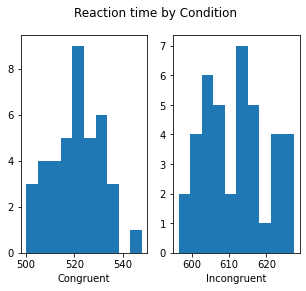

In [7]:
#Warning for running the plots, once you run everything, it'll create a weird plot with everything on top of each other. Running each plot individually shows you that all of them work.

def PlotHist(by_participant): #Function to generate two histograms, one represents the congruent RT and the other represents the incongruent RT. 
    plots = plt.figure(num = 2, figsize =(5.0,4.0)) #Generate a figure with two subplots 
    plots.suptitle('Reaction time by Condition') #Label the figure with what I'm plotting 
    axes1 = plots.add_subplot(1,2,1) #create the first subplot, indicate the it is one line, two plots, and the first plot in the line 
    axes2 = plots.add_subplot(1,2,2) #create the second subplot, indicates that it is one line, two plots, and the second plot in the line 
    consorted = by_participant.loc[by_participant['Condition'] == 'Congruent']['RT'] #locate the congruent condition's reaction times 
    inconsorted = by_participant.loc[by_participant['Condition'] == 'Incongruent']['RT'] #locate the incongruent condition's reaction times 
    axes1.set_xlabel ('Congruent') #setting the label for the subplot on the x-axis 
    axes2.set_xlabel ('Incongruent') #setting the label for the second subplot on the x-axis 
    axes1.hist(consorted) #create the histogram using the located congruent RTs
    axes2.hist(inconsorted) #create the second subplot histogram using the located incongruent RTs
     
PlotHist(by_participant) #call function

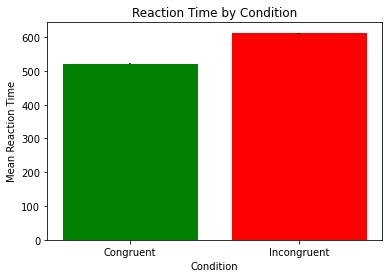

In [6]:
def PlotBar(by_participant): #Plot a bar graph using the dataframe 
    consorted = by_participant[by_participant['Condition'] == 'Congruent']['RT'].mean() #locate the incongruent condition's RTs 
    inconsorted = by_participant[by_participant['Condition'] == 'Incongruent']['RT'].mean()
    condition = ['Congruent', 'Incongruent'] #Creating a list of conditions to use as the x - axis data
    values = [consorted, inconsorted] #this is the list of means for each condition to be used as the plotted data 
    colors = ['green','red'] #This is to change the colour of each bar, the green is the congruent bar and the red is the incongruent bar. This needed to be a list with the colours in the intended order to then pass it into the colour part of the bar function. 
    SD_con = by_participant[by_participant['Condition'] == 'Congruent']['RT'].std() #Calculate the standard deviation of the congruent condition for the standard error 
    SD_incon = by_participant[by_participant['Condition'] == 'Incongruent']['RT'].std() #Calculate the standard deviatioon of the incongruent condition for the standard error 
    SE_con = SD_con/np.sqrt(40) #Calculate the standard error for the congruent condition
    SE_incon = SD_incon/np.sqrt(40) #Calculate the standard error for incongruent condition
    plt.bar(condition, values, color = colors, yerr = [SE_con, SE_incon]) #create a bar graph using the conditions on the x axis, the RT on the y axis, set the colour for each bar based on the list I created, and put the error bars 
    plt.title('Reaction Time by Condition') #This is the title of the whole graph
    plt.ylabel('Mean Reaction Time') #Y axis label
    plt.xlabel('Condition') #x axis label
    
PlotBar(by_participant) #call the function

**Commnents:**
- Not bad. In general I would try to fix your code rather than rely on the user having to run it in a particular way. 
- Again, no need for the functions here. 
- Would have liked to have seen axis labels and a title on the first plot.
- code 4/6, documentation 5/6. **total: 9/12**

## **Question 5 --- Plotting with Seaborn**

Using Seaborn:

1.  Create a violin plot of RTs by condition. (You may need to look at the violin plot documentation)
2.  Create a line plot with condition on the x-axis and RT on the y axis, using different hues for each participant. 


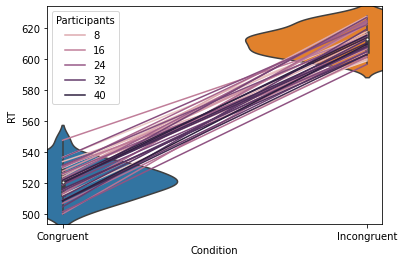

In [8]:

#Looked at class notes and the documentation for this plot 
def violinplot (by_participant): #create a violin plot using seaborn
    sns.violinplot(data = by_participant, x = 'Condition', y = 'RT') #Creating the plot using the by_participants dataframe. X is the condition, y is the RT
    
violinplot(by_participant) #call function

#looked at the class notes and the documentation in seaplot for this one 
def lineplot (by_participant): #create a line plot 
    sns.lineplot(data = by_participant, x = 'Condition', y = 'RT', hue = 'Participants') #creating a line plot using the by_participant data frame. X represents the condition, y represents the RT, hue is set to participants, it grouped participants in groups of eight and each group has a specific colour. 
    
lineplot(by_participant) #call the function 


**Comments:**
- Again, plot does something weird when code run together. Fix your code!
- Figure captions should be included (documenation).
- code: 2/3, documentation: 2/3, **total: 4/6**


## **Question 6 --- Curve Fitting: Visual Working Memory Capacity**

Researchers often measure visual working memory capacity (K) across
increasing memory loads.\
You are given:

    loads = np.array([1, 2, 3, 4, 5, 6])
    k = np.array([0.9000, 1.8000, 2.7000, 3.5000, 3.1966, 3.7939])

There are different models that describe the change in performance. One is a model that increases linearly up to a breakpoint (capacity limit), then stays flat.\

This is a model with **two stages**:

1.  **Linear growth stage:**\
    Performance increases steadily as memory load increases. 

2.  **Flat stage (capacity limit):**\
    After a certain point (the **breakpoint**), performance stops
    increasing because the memory system has reached its limit.\
    The breakpoint is the **estimated capacity**.


The model can be expressed as:

    if load ≤ k_break:
        y = a * load + b    # K is increasing with load
    else:
        y = a * k_break + b   # K stays constant

The second model is an exponential model. This model can be expressed as:



    y = A * (1 – exp(-B * load)) + C


  1. Fit both models to the data, where x is `load` and y is `k`. Report the relevant parameters for each model.  
  2. Plot both fits on the same Figure and subplot (do not use two subplots) using `matplotlib`


/Users/semrich/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


'Sources include:\n    geeksforgeeks.org\n    matplotlib documentation\n    seaborn plot documentation\n    ChatGPT used where specified'

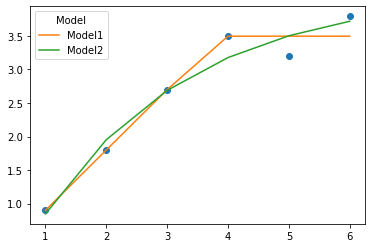

In [9]:

#Question 6 

#needed a lot of help with this one, used chatgpt to help with this one. 
loads = np.array([1, 2, 3, 4, 5, 6]) #set up x data 
k = np.array([0.9000, 1.8000, 2.7000, 3.5000, 3.1966, 3.7939]) #set up y data 


def model1fit(x, a,b, k_break): #def function to put the line's equation in 
    y = [] #to append the formula to in order to use in the plotting of the line 
    for load in x: #cycle through the x data 
        if load <= k_break:
            y.append(a * load + b)# K is increasing with load
        else:
            y.append(a * k_break + b) # K stays constant
    return np.array(y) #return it as an array because I kept getting issues plotting the data if it wasn't stored in an array. 


def model2fit (x, A, B,C): #another function to put the second model's line equation in 
    return A * (1 - np.exp(-B * x)) + C #The equation to be graphed 
        
parameters1, covariance1 = curve_fit(model1fit, loads, k) #using curve fit to draw the line for model 1
parameters2, covariance2 = curve_fit(model2fit, loads, k) #using curve fit to draw the line for model 2 

model1_y_fit = model1fit(loads, *parameters1) #This is where I got stuck the most, and going to draw it. Basically this is creating a y value that I can insert into the plot drawing function later by using the parameters calculated above and the loads that will be used as x. The * allows it to be unpacked. 
model2_y_fit = model2fit(loads, *parameters2) #Same thing but for model two. 


plt.plot(loads, k, 'o') #plot the initial data from loads and k 
plt.plot(loads, model1_y_fit, linestyle = '-', label = 'Model1') #Got stuck here as well, needed chatgpt for help here. I passed loads as x and the model_y_fit1 represents the parameters that were passed into the formula then that calculation was used to map this line. 
plt.plot(loads, model2_y_fit, linestyle = '-', label = 'Model2') #Same as above but for model2 instead. 
plt.legend(title = 'Model') #adding a legend so each line can be identified. 

"""Sources include:
    geeksforgeeks.org
    matplotlib documentation
    seaborn plot documentation
    ChatGPT used where specified"""


**Comments:**
- Good, but a I would like to see that you know more about what you used AI for - i.e., what problems were you having. What did you not understand?
- Your documentation states that the `curve_fit` call is to draw the line, which is incorrect. 
- What does the `*parameters` call do?
- Your continuous model also has breaks at each value of load, which is not usually how we draw a continuous function
- No lables on axes or title.
- Didn't report the parameters


- code: 5/6, documentation: 2/6, **total: 7/12**

**Total grade: 43/60**